In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = [1,2,3,4]

In [3]:
def ADWIN(x,delta):
    W = []
    sizes = []
    for i,xi in enumerate(x):
        W.append(xi)
        sizes.append(len(W))
        if len(W) > 10:
            for split in range(1,len(W)-1):
                W0 = W[:split]
                W1 = W[split:]
                
                n0 = len(W0)
                n1 = len(W1)
                n = n0+n1

                m = 1/(1/n0 + 1/n1)
                delta_prime = delta/n

                W_sigma = np.std(W)
                ecut = np.sqrt(2/m*W_sigma**2*np.log(2/delta_prime)) + 2/(3*m)*np.log(2/delta_prime)

                W0_mean = np.mean(W0)
                W1_mean = np.mean(W1)

                if abs(W0_mean-W1_mean) >= 2*ecut:
                    W[:split] = []
                    print("Drift Detection",i)
                    break
    return np.array(sizes)

In [12]:
x = np.concatenate((np.random.normal(loc=5,scale=.3,size=(300,)),10-np.arange(200,600)*10/400 + np.random.normal(scale=.3,size=(400,)),np.random.normal(loc=-5,scale=.3,size=(500,))))
x = (x-min(x))/(max(x)-min(x))
sizes = ADWIN(x,.3)
sizes = (sizes-min(sizes))/(max(sizes)-min(sizes))
plt.plot(x)
plt.plot(sizes)
plt.show()

Drift Detection 323


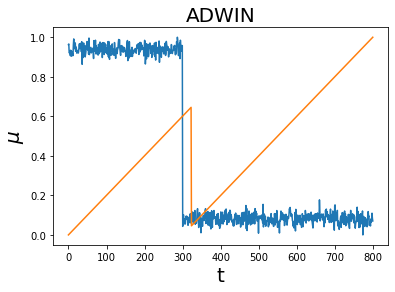

In [22]:
plt.plot(x)
plt.plot(sizes)
plt.xlabel("t",fontsize=20)
plt.ylabel("$\mu$",fontsize=20)
plt.title("ADWIN",fontsize=20)
plt.show()

Drift Detection 322


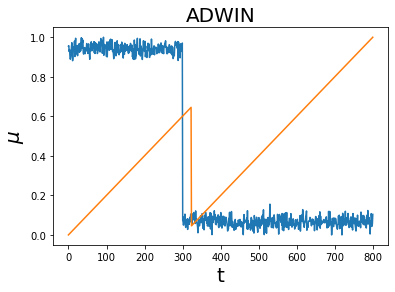

In [23]:
x = np.concatenate((np.random.normal(loc=5,scale=.3,size=(300,)),np.random.normal(loc=-5,scale=.3,size=(500,))))
x = (x-min(x))/(max(x)-min(x))
sizes = ADWIN(x,.3)
sizes = (sizes-min(sizes))/(max(sizes)-min(sizes))
plt.plot(x)
plt.plot(sizes)
plt.xlabel("t",fontsize=20)
plt.ylabel("$\mu$",fontsize=20)
plt.title("ADWIN",fontsize=20)
plt.show()